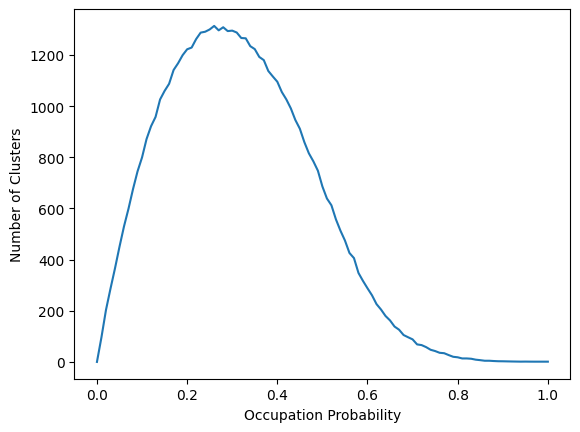

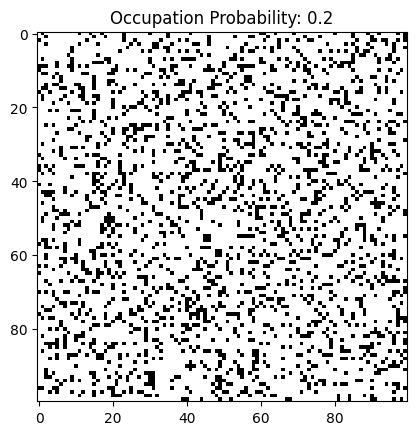

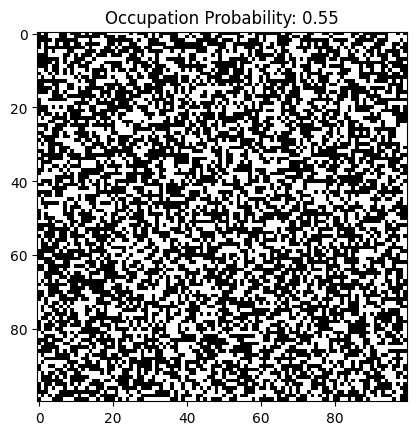

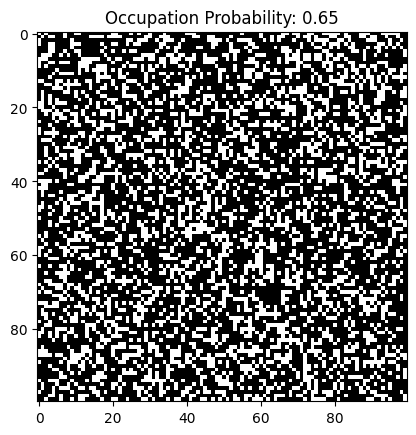

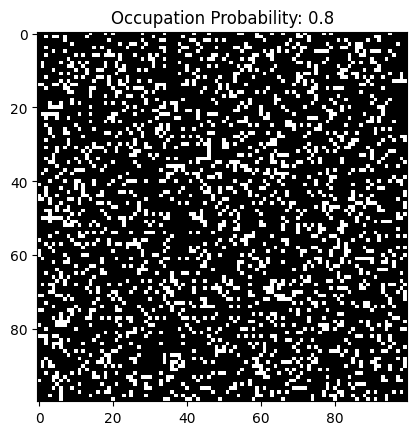

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def percolation(N, p):
    # Initialize the lattice with zeros
    lattice = [[0 for i in range(N)] for j in range(N)]


    # Fill the rest of the lattice randomly with probability p
    for i in range(0, N):
        for j in range(N):
            if random.random() < p:
                lattice[i][j] = 1

    # Find the clusters
    clusters = [[0 for i in range(N)] for j in range(N)]
    current_cluster = 1
    stack = []
    for i in range(N):
        for j in range(N):
            if lattice[i][j] == 1 and clusters[i][j] == 0:
                stack.append((i, j))
                while stack:
                    x, y = stack.pop()
                    if clusters[x][y] == 0:
                        clusters[x][y] = current_cluster
                        if x > 0 and lattice[x-1][y] == 1 and clusters[x-1][y] == 0:
                            stack.append((x-1, y))
                        if x < N-1 and lattice[x+1][y] == 1 and clusters[x+1][y] == 0:
                            stack.append((x+1, y))
                        if y > 0 and lattice[x][y-1] == 1 and clusters[x][y-1] == 0:
                            stack.append((x, y-1))
                        if y < N-1 and lattice[x][y+1] == 1 and clusters[x][y+1] == 0:
                            stack.append((x, y+1))
                current_cluster += 1

    # Count the number of clusters
    num_clusters = current_cluster - 1

    return num_clusters

# Set the lattice size
N = 100

# Generate a range of occupation probabilities
p_vals = np.linspace(0, 1, 101)

# Simulate percolation for each occupation probability
num_clusters = []
for p in p_vals:
    num_clusters_avg = 0
    for i in range(10):
        num_clusters_avg += percolation(N, p)
    num_clusters_avg /= 10
    num_clusters.append(num_clusters_avg)

# Plot the number of clusters vs occupation probability
plt.plot(p_vals, num_clusters)
plt.xlabel('Occupation Probability')
plt.ylabel('Number of Clusters')
plt.show()

# Generate snapshots of the occupation on the grid for a few different p values
for p in [0.2, 0.55, 0.65, 0.8]:
    lattice = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        for j in range(N):
            if random.random() < p:
                lattice[i][j] = 1
    plt.imshow(lattice, cmap='binary')
    plt.title(f'Occupation Probability: {p}')
    plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np


def percolation(N, p):
    # Initialize the lattice with zeros
    lattice = [[0 for i in range(N)] for j in range(N)]

    # Fill the rest of the lattice randomly with probability p
    for i in range(N):
        for j in range(N):
            if random.random() < p:
                lattice[i][j] = 1

    # Find the clusters
    clusters = [[0 for i in range(N)] for j in range(N)]
    current_cluster = 1
    stack = []
    for i in range(N):
        for j in range(N):
            if lattice[i][j] == 1 and clusters[i][j] == 0:
                stack.append((i, j))
                while stack:
                    x, y = stack.pop()
                    if clusters[x][y] == 0:
                        clusters[x][y] = current_cluster
                        if x > 0 and lattice[x-1][y] == 1 and clusters[x-1][y] == 0:
                            stack.append((x-1, y))
                        if x < N-1 and lattice[x+1][y] == 1 and clusters[x+1][y] == 0:
                            stack.append((x+1, y))
                        if y > 0 and lattice[x][y-1] == 1 and clusters[x][y-1] == 0:
                            stack.append((x, y-1))
                        if y < N-1 and lattice[x][y+1] == 1 and clusters[x][y+1] == 0:
                            stack.append((x, y+1))
                current_cluster += 1

    # Check for a spanning cluster
    spanning_cluster = False
    for i in range(N):
        if clusters[i][N-1] != 0:
            for j in range(N):
              if(clusters[j][0] != 0  and clusters[j][0] == clusters[i][N-1] and clusters[j][0] in clusters[N-1] and clusters[j][0] in clusters[0]):
                spanning_cluster = True
                break
        if spanning_cluster:
            break

    return spanning_cluster, clusters


In [ ]:
p_vals = np.linspace(0, 1, 50)
pvals = []
pvals2 = []
for i in range(50):
  for p in p_vals:
    perc, clusters = percolation(100,p)
    p31 = np.asarray(clusters)
    if(perc):
      pvals2.append(p)
      pvals.append((p31 > 0).sum()/(100*100))
      break

print(np.average(pvals), np.average(pvals2))
pc = np.average(pvals)


0.609156 0.6085714285714285


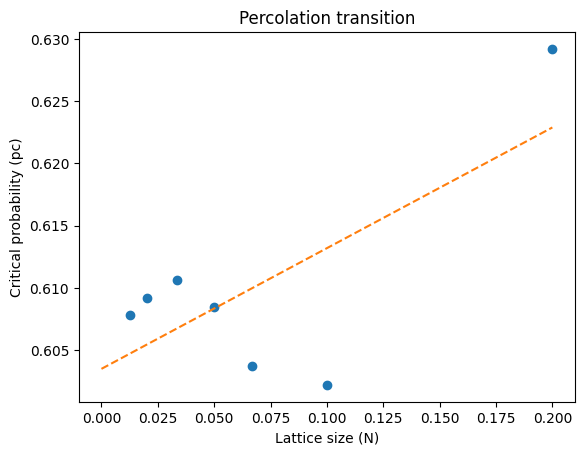

[0.2, 0.1, 0.06666666666666667, 0.05, 0.03333333333333333, 0.02, 0.0125] [0.6291999999999999, 0.6022, 0.6037333333333332, 0.6085, 0.6106222222222223, 0.6092, 0.60778125]


In [ ]:
# Set the lattice sizes to simulate
Ns = [5,10,15,20,30,50,80]

# Set the number of simulations to average over for each lattice size
num_simulations = 100

# Initialize lists to store the critical probabilities and corresponding N values
pc_vals = []
N_vals = []

# Simulate percolation for each lattice size
for N in Ns:
    pc = []
    for i in range(num_simulations):
        p_vals = np.linspace(0, 1, 50)
        for p in p_vals:
            perc, clusters = percolation(N, p)
            p31 = np.asarray(clusters)
            if(perc):
              pc.append((p31 > 0).sum()/(N**2))
              break
    pc_vals.append(np.average(pc))
    N_vals.append(1/N)

# Extrapolate to the infinite-size limit using a linear fit
fit = np.polyfit(N_vals, pc_vals, 1)
pc_0 = fit[1]

# Plot the critical probabilities vs lattice size
plt.plot(N_vals, pc_vals, 'o')
plt.plot([0, max(N_vals)], [pc_0, pc_0 + fit[0]*max(N_vals)], '--')
plt.xlabel('Lattice size (N)')
plt.ylabel('Critical probability (pc)')
plt.title('Percolation transition')
plt.show()

print(N_vals, pc_vals)

While not a perfect fit and with some discrepency, we do see that the fit line leads to a value of approximately .6 which is extremely close to that of the expected value of .5927

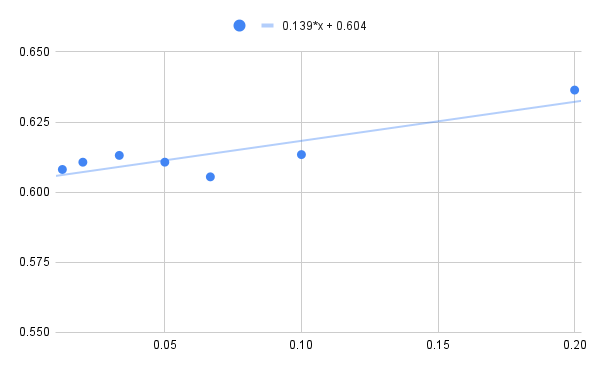

In [ ]:
def percolation(N, p):
    # Initialize the lattice with zeros
    lattice = [[0 for i in range(N)] for j in range(N)]

    # Fill the rest of the lattice randomly with probability p
    for i in range(N):
        for j in range(N):
            if random.random() < p:
                lattice[i][j] = 1

    # Find the clusters
    clusters = [[0 for i in range(N)] for j in range(N)]
    current_cluster = 1
    stack = []
    for i in range(N):
        for j in range(N):
            if lattice[i][j] == 1 and clusters[i][j] == 0:
                stack.append((i, j))
                while stack:
                    x, y = stack.pop()
                    if clusters[x][y] == 0:
                        clusters[x][y] = current_cluster
                        if x > 0 and lattice[x-1][y] == 1 and clusters[x-1][y] == 0:
                            stack.append((x-1, y))
                        if x < N-1 and lattice[x+1][y] == 1 and clusters[x+1][y] == 0:
                            stack.append((x+1, y))
                        if y > 0 and lattice[x][y-1] == 1 and clusters[x][y-1] == 0:
                            stack.append((x, y-1))
                        if y < N-1 and lattice[x][y+1] == 1 and clusters[x][y+1] == 0:
                            stack.append((x, y+1))
                current_cluster += 1

    # Check for a spanning cluster
    spanning_cluster = False
    spanning_value = -1
    for i in range(N):
        if clusters[i][N-1] != 0:
            for j in range(N):
              if(clusters[j][0] != 0  and clusters[j][0] == clusters[i][N-1] and clusters[j][0] in clusters[N-1] and clusters[j][0] in clusters[0]):
                spanning_cluster = True
                spanning_value = clusters[j][0]
                break
        if spanning_cluster:
            break

    return spanning_cluster, clusters, spanning_value


In [ ]:
F = []
probability = np.linspace(pc, .8, 50)
for p in probability:
  avg = []
  for i in range(50):
    spanning, clusters, spanval = percolation(100,p)
    p31 = np.asarray(clusters)
    total = (p31 > 0).sum()
    inspan = (p31 == spanval).sum()
    avg.append(inspan/total)
  F.append(np.average(avg))

<ipython-input-14-97ef0e7f7dcd>:5: RuntimeWarning: divide by zero encountered in power
  return F0 * (x - pc)**beta


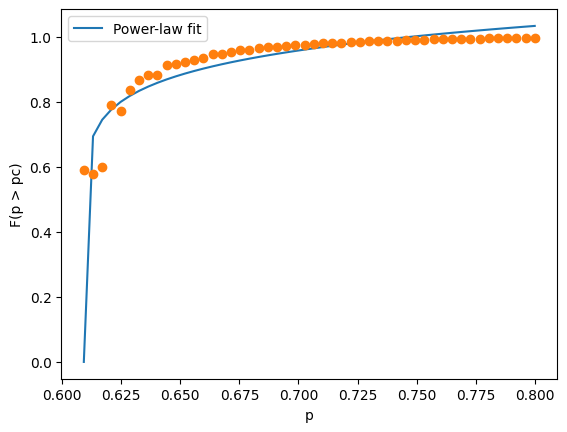

F0 = 1.2255127958570864
beta = 0.10231749268554526


In [ ]:
#@title
import scipy.optimize as stats

def power_law(x, F0, beta):
    return F0 * (x - pc)**beta

# fit the results to the power-law ansatz
popt, pcov = stats.curve_fit(power_law, probability, F, p0=[1, 1])

# plot the results and the power-law fit
plt.plot(probability, power_law(probability, *popt), label='Power-law fit')
plt.plot(probability, F, 'o')
plt.xlabel('p')
plt.ylabel('F(p > pc)')
plt.legend()
plt.show()

# print the parameters of the power-law fit
print('F0 =', popt[0])
print('beta =', popt[1])